<a href="https://colab.research.google.com/github/kiron-ang/cwjc/blob/main/pie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive/


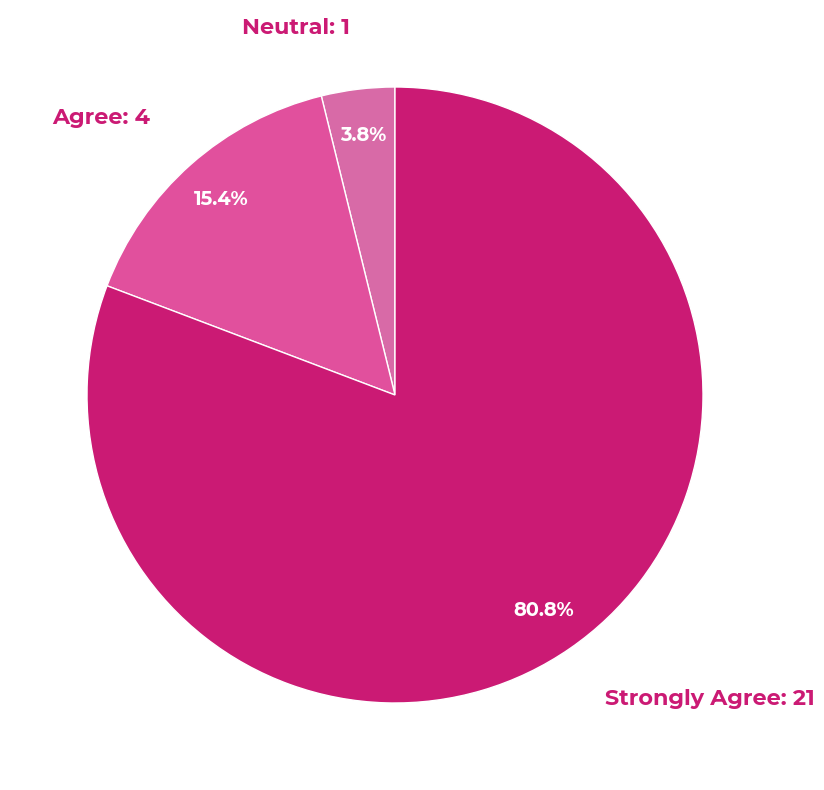

Saved: 001-feel-encouraged.png


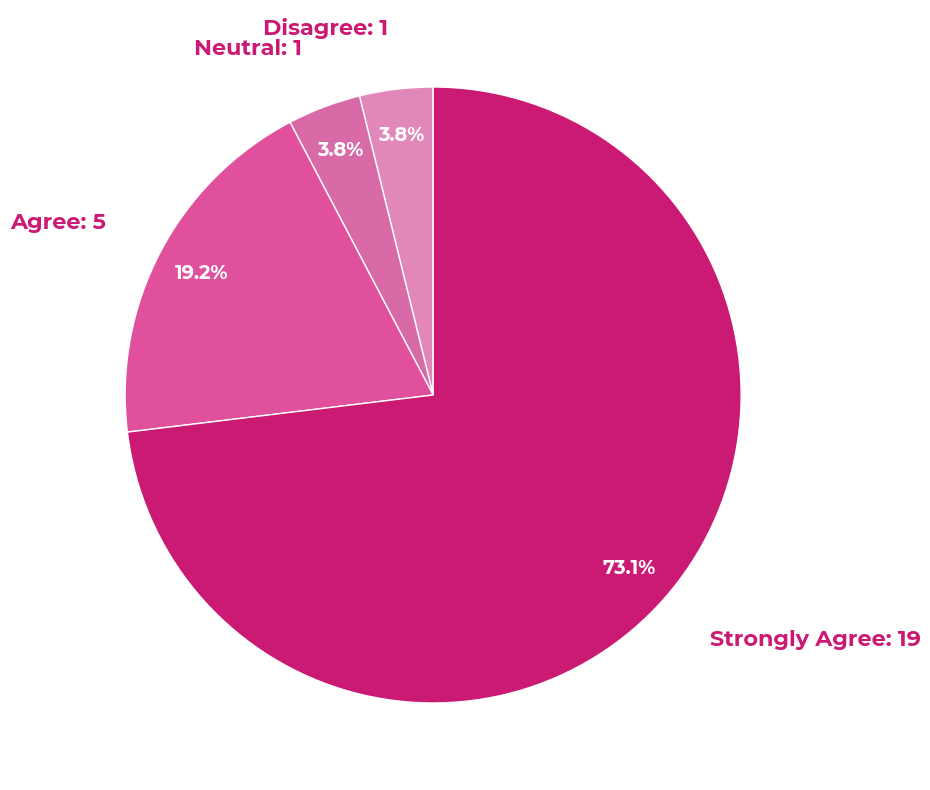

Saved: 002-necessary-success.png


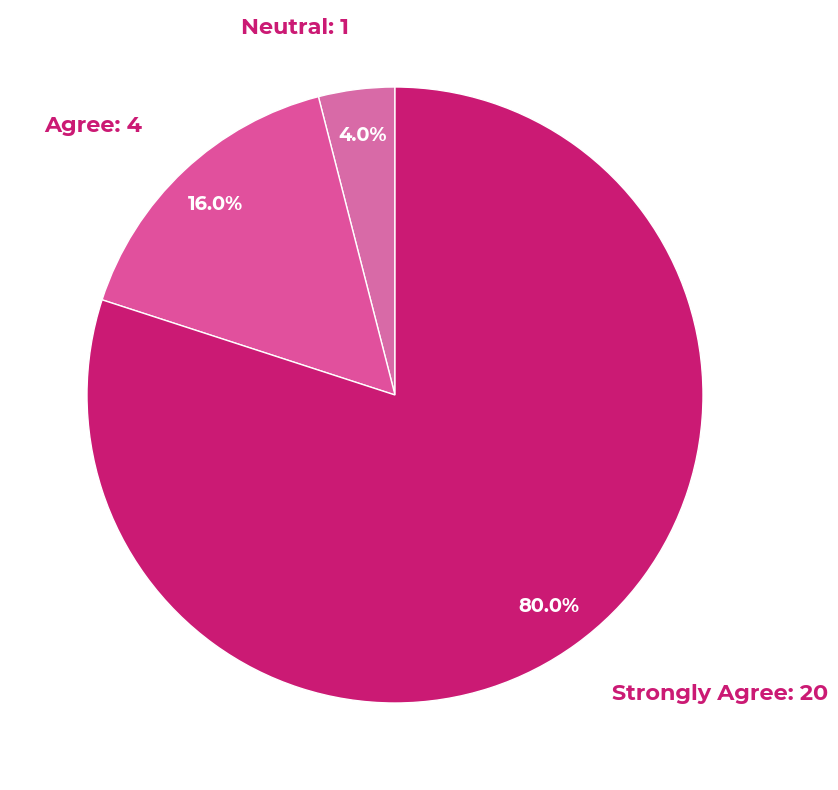

Saved: 003-belong-cwjc.png


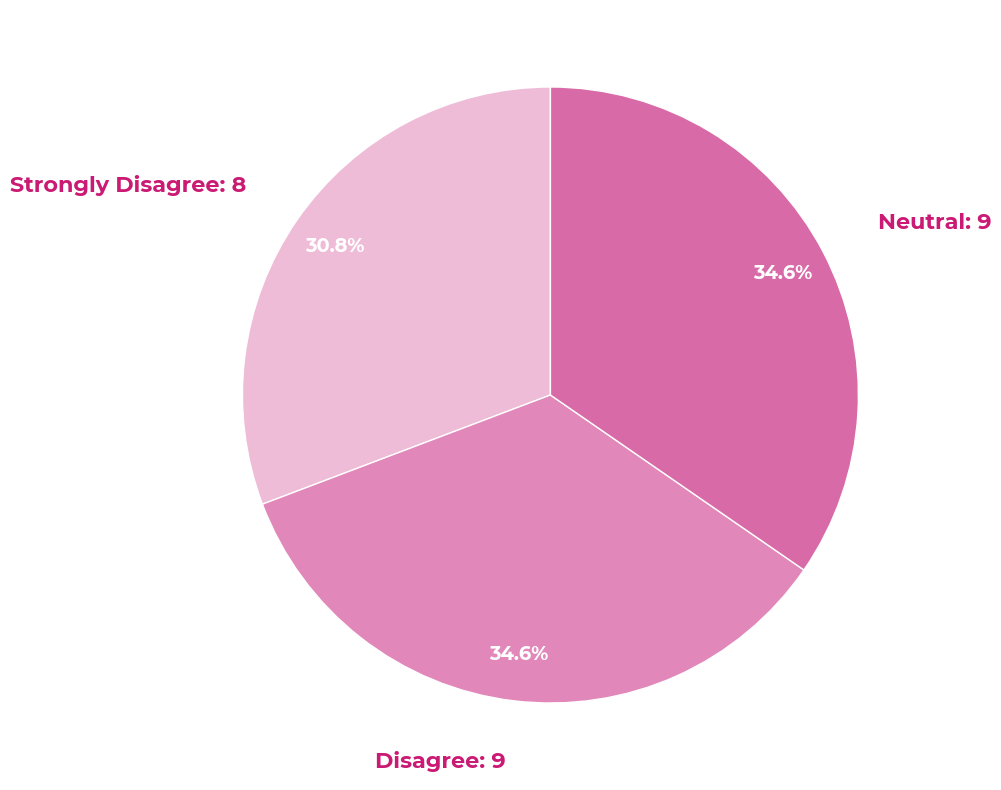

Saved: 004-discouraged-absent.png


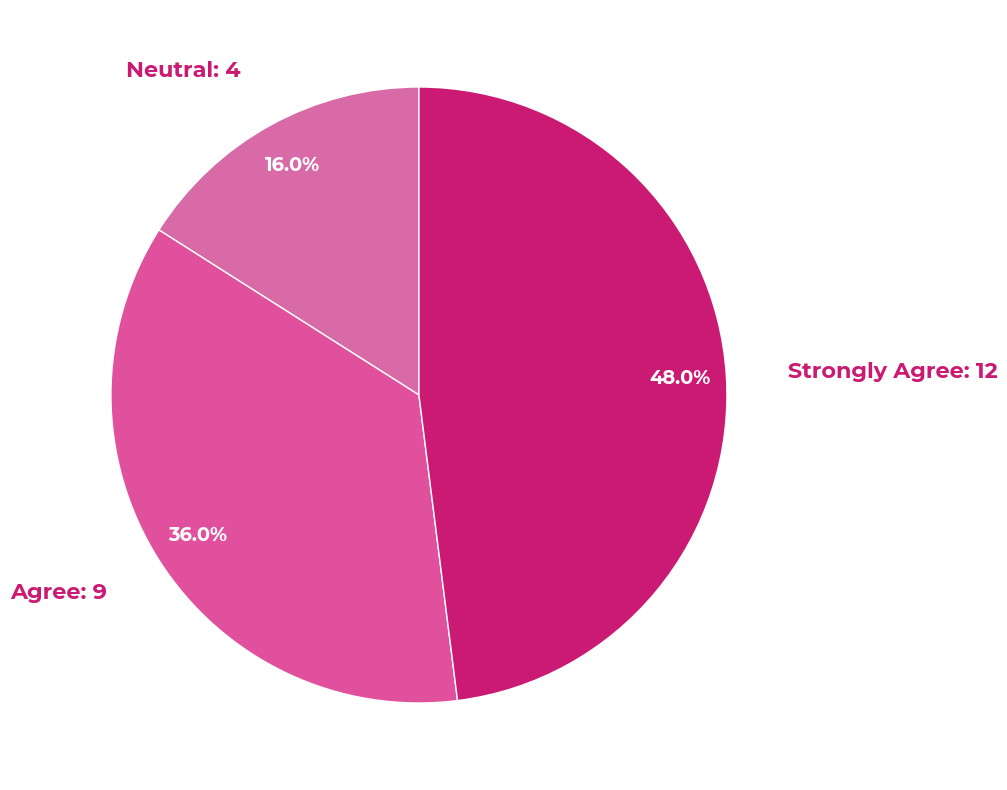

Saved: 005-attend-engagement.png


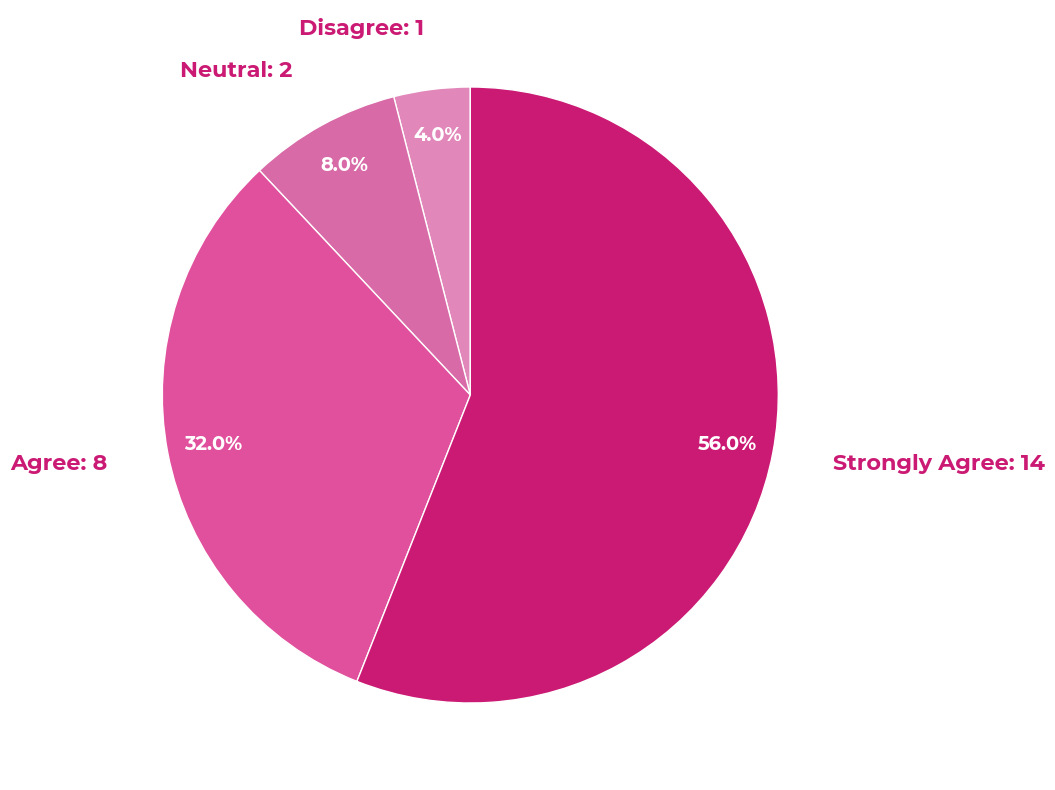

Saved: 006-pleased-attend.png


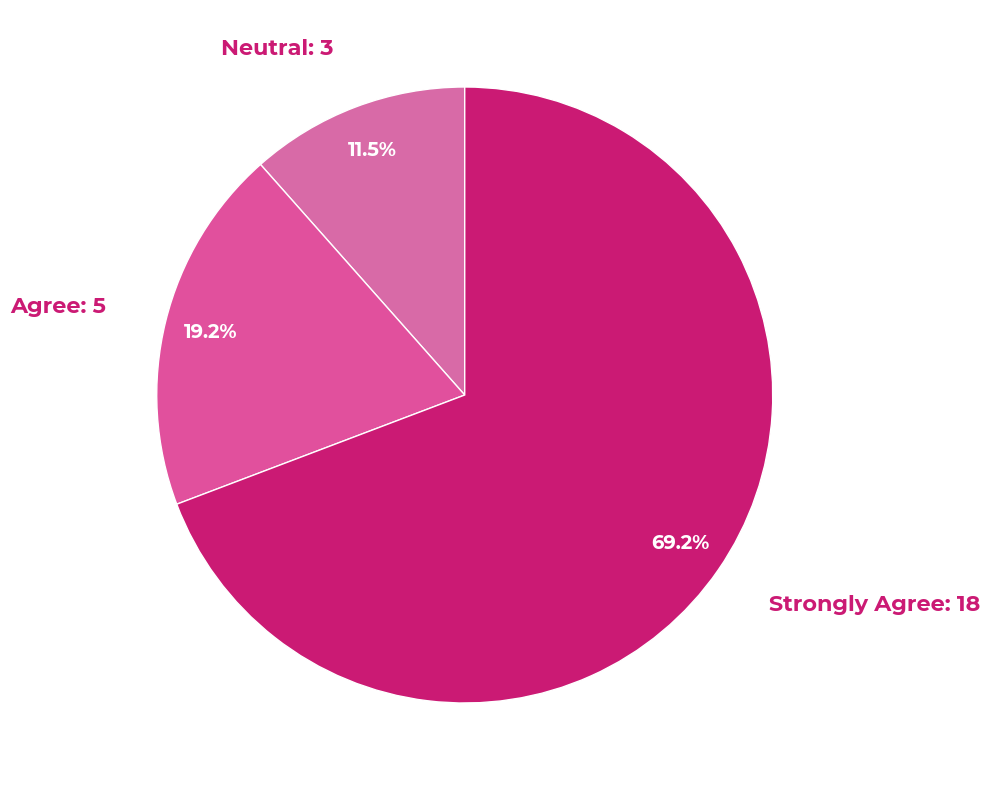

Saved: 007-enjoy-engagement.png


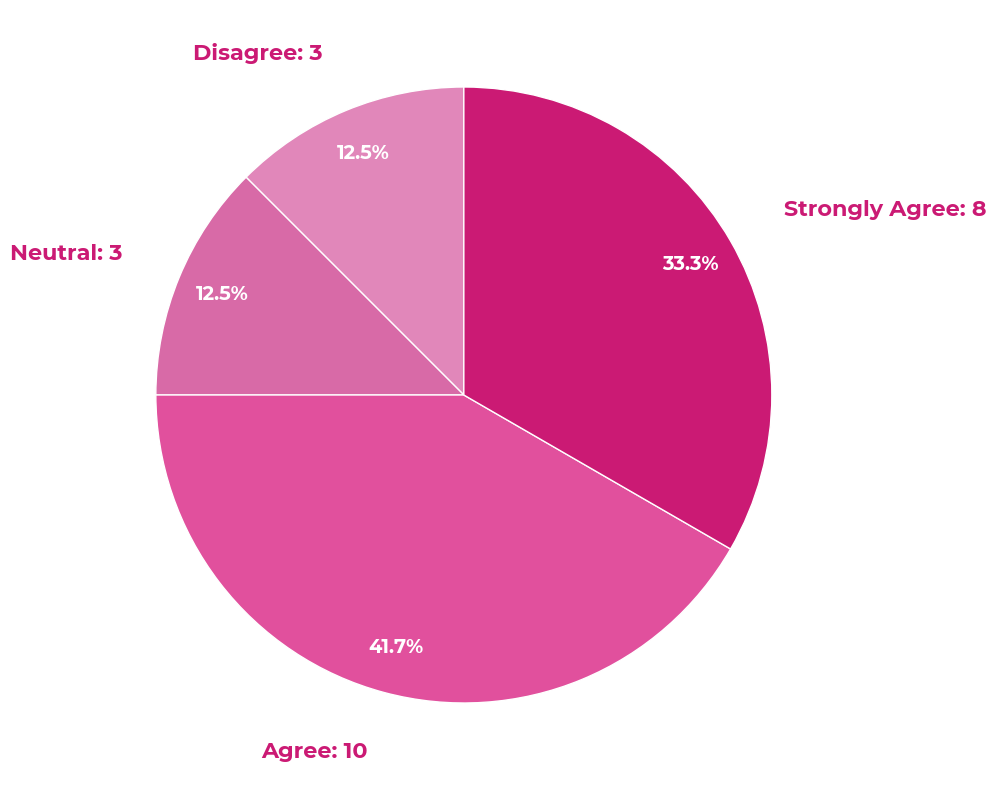

Saved: 008-attendance-consistent.png


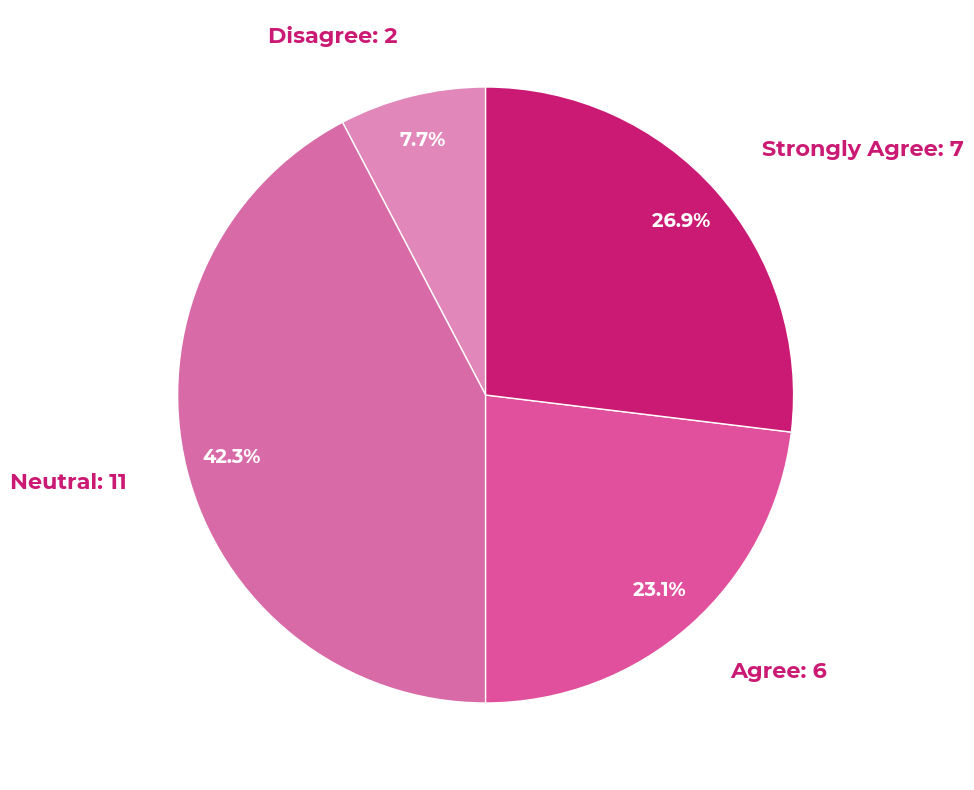

Saved: 009-new-friends.png


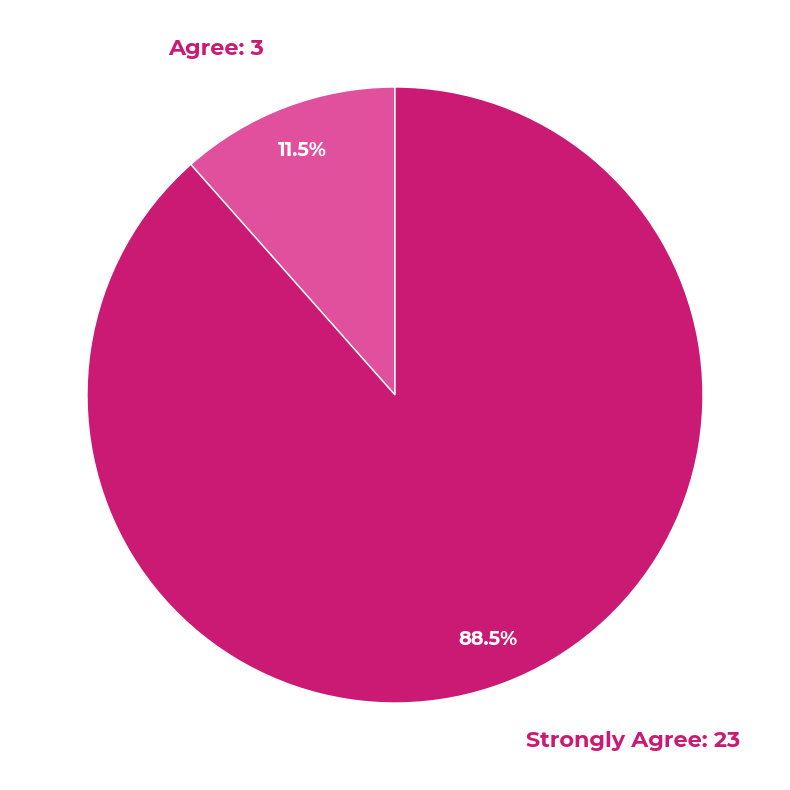

Saved: 010-rewarding-worthwhile.png


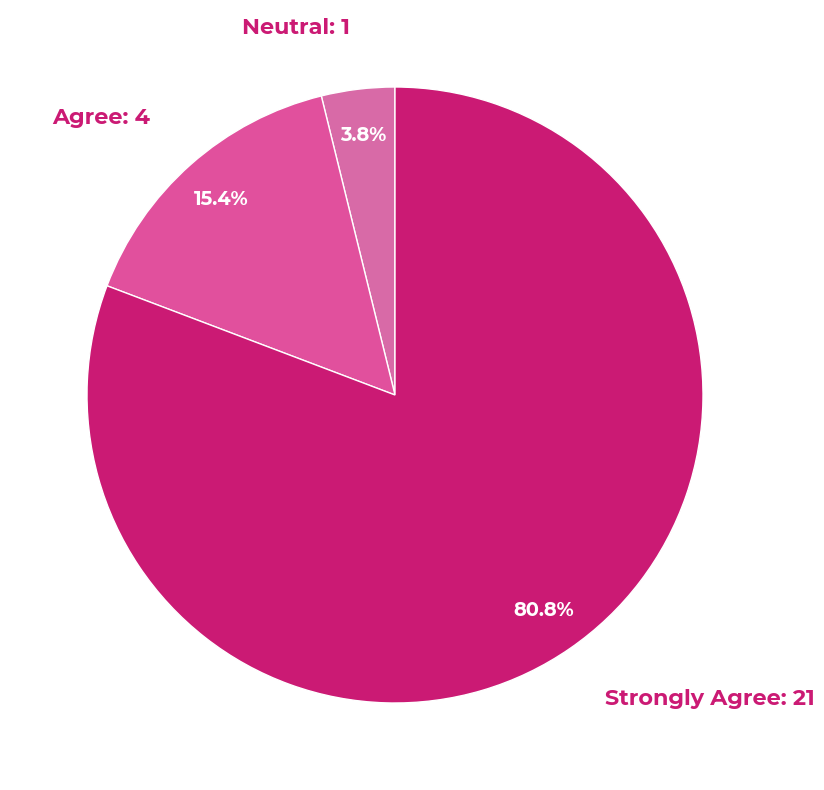

Saved: 011-look-forward.png


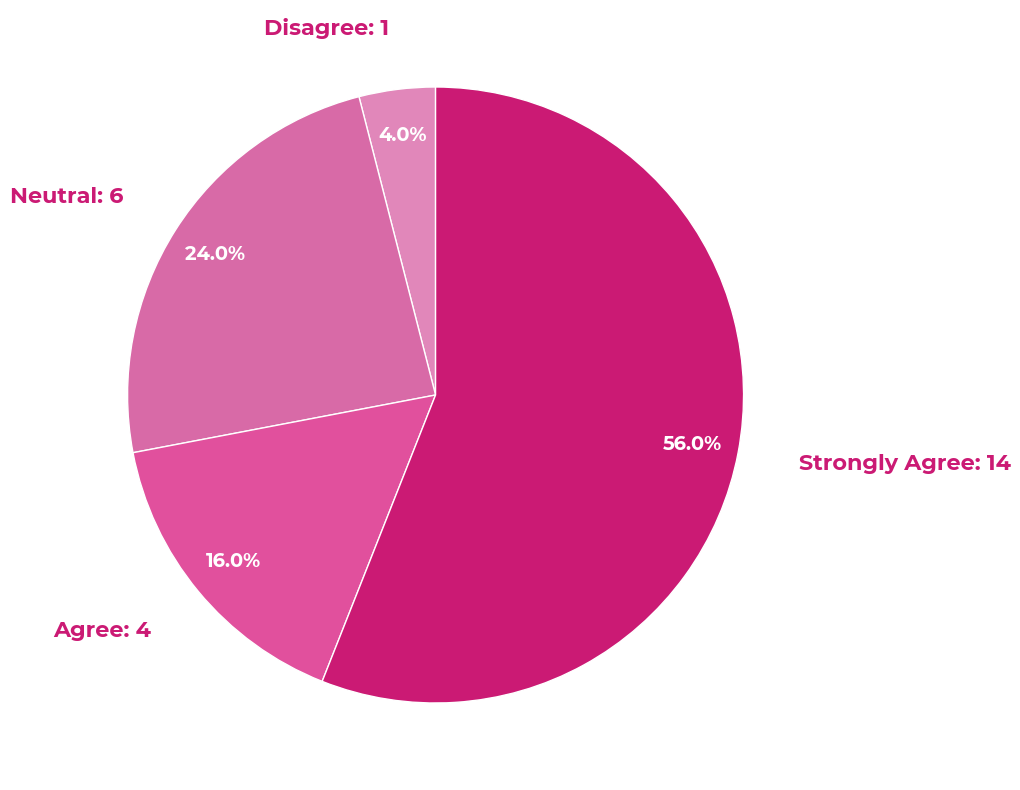

Saved: 012-academic-goals.png


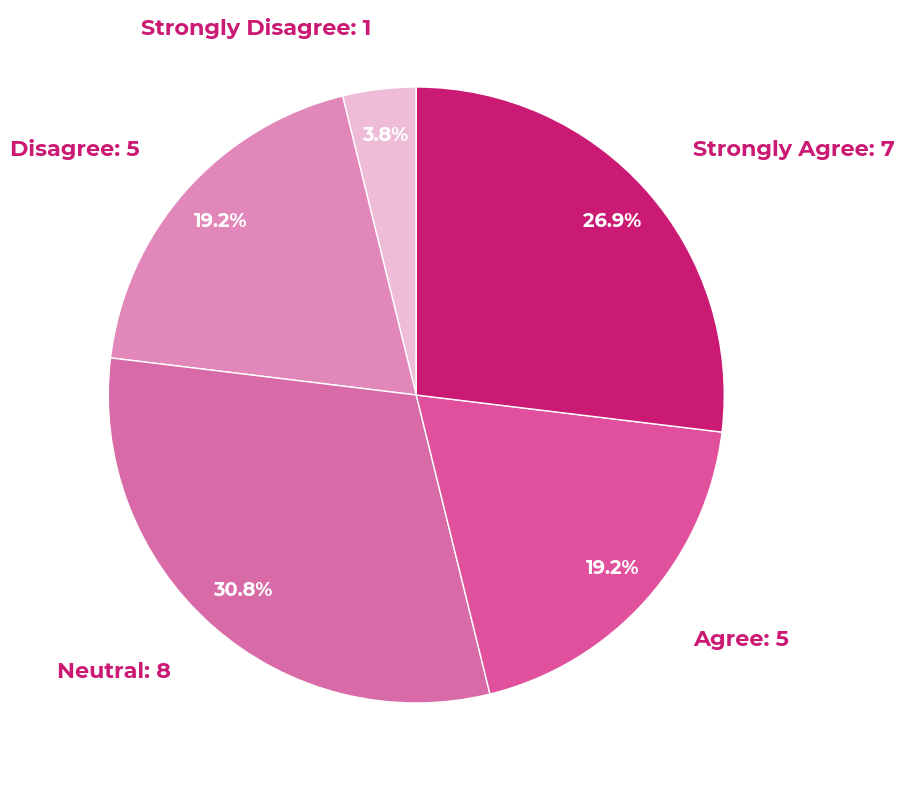

Saved: 013-talk-other.png


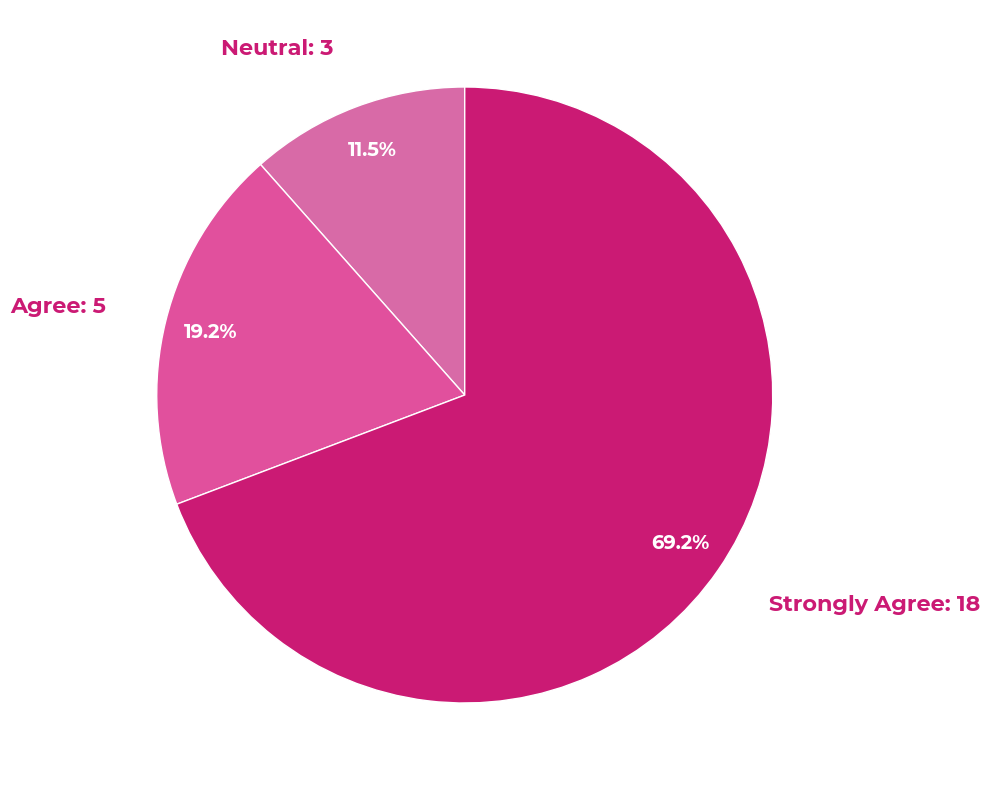

Saved: 014-consider-community.png
All pie charts have been compressed into survey_pie_charts.zip
All pie charts have been generated.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap
import os
import zipfile
from google.colab import drive

drive.mount('/content/drive/')
montserrat_path = '/content/drive/My Drive/montserrat.ttf'
fm.fontManager.addfont(montserrat_path)
plt.rcParams['font.family'] = 'montserrat'

df = pd.read_csv('/content/drive/My Drive/survey-data.csv')

colors = ['#eebcd7', '#e187ba', '#d86aa7', '#e1509d', '#cb1a74']

label_map = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly Agree'
}

generated_files = []

def create_pie_chart(column_name, column_data):
    if column_name in ['000-id-number', '015-day-evening', '016-anything-else']:
        return

    column_data = column_data.replace('[BLANK]', np.nan)
    column_data = pd.to_numeric(column_data, errors='coerce')

    value_counts = column_data.value_counts().sort_index()
    filtered_counts = {k: v for k, v in value_counts.items() if k in [1, 2, 3, 4, 5]}

    if len(filtered_counts) == 0:
        return

    plt.figure(figsize=(10, 8))

    total = sum(filtered_counts.values())
    labels = [f"{label_map[k]}: {filtered_counts[k]}" for k in filtered_counts.keys()]

    wedges, texts, autotexts = plt.pie(
        filtered_counts.values(),
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=0.85,
        startangle=90,
        colors=[colors[int(k)-1] for k in filtered_counts.keys()],
        wedgeprops={'edgecolor': 'w'},
        textprops={'fontsize': 16, 'color': '#cb1a74'},
        labeldistance=1.2
    )

    for autotext in autotexts:
        autotext.set_fontsize(14)
        autotext.set_weight('bold')
        autotext.set_color('white')

    plt.tight_layout()
    output_file = f"{column_name}.png"
    plt.savefig(output_file, dpi=600, bbox_inches='tight', facecolor='white')
    plt.show()
    plt.close()
    print(f"Saved: {output_file}")

    generated_files.append(output_file)

for column_name in df.columns:
    create_pie_chart(column_name, df[column_name])

zip_filename = "survey_pie_charts.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in generated_files:
        zipf.write(file)

print(f"All pie charts have been compressed into {zip_filename}")
print("All pie charts have been generated.")